#####Created on 24-April-2020 -- By Naganandini Subbaraja#####

### Class Predictions in Deep Learning using a simple CNN Architecture 

This is a naive attempt to understand the CNN Architecture, modelling and metrics.

**NOTE:** The dataset taken here is very small in the context of Deep Learning. 

I have a folder named **my_train_data.** In this I have three different folders (named as gaanu, chubby, dyutith -- Names of children) maintained for 3 different classes which has around 10 images(of children) in each of these folders.

In [3]:
import tensorflow
print(tensorflow.__version__)

1.6.0


In [4]:
from tensorflow.python import keras
print(keras.__version__)

2.1.3-tf


In [5]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D
from tensorflow.python.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers import Dense

In [12]:
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 3, activation = 'softmax'))
classifier.summary()
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 387       
Total para

In [6]:
# Part 2 - Fitting the CNN to the images
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from IPython.display import display
from PIL import Image

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:/Users/Naganandini/Nandu/DEEP learning/CNN/my_train_data',
                                                 target_size = (64, 64),
                                                 batch_size = 32)

test_set = test_datagen.flow_from_directory('C:/Users/Naganandini/Nandu/DEEP learning/CNN/my_train_data',
                                            target_size = (64, 64),
                                            batch_size = 32)

classifier.fit_generator(training_set,
                         steps_per_epoch = 800,
                         epochs = 1,
                         validation_data = test_set,    
                         validation_steps = 200)

Found 35 images belonging to 3 classes.
Found 35 images belonging to 3 classes.
Epoch 1/1
800/800 [==============================]800/800 [==============================] - 1090s 1s/step - loss: 0.0592 - acc: 0.9753 - val_loss: 8.7518e-06 - val_acc: 1.0000



In [14]:
!pip install pillow

In [16]:
# Part 3 - Making new predictions
import numpy as np
from tensorflow.python.keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

**This is the prediction for class 0 (Gaanu) prediction**

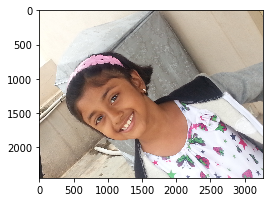

In [20]:
im = mpimg.imread('C:/Users/Naganandini/Nandu/DEEP learning/CNN/my_test_data/gaanu.jpg')
fig=plt.figure(figsize=(4,4))
plt.imshow(im)
plt.show()

In [33]:
test_image = image.load_img('C:/Users/Naganandini/Nandu/DEEP learning/CNN/my_test_data/gaanu.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

{'Gaanu': 0, 'chubby': 1, 'dyutith': 2}

In [16]:
print(result)

[[1. 0. 0.]]


In [23]:
if result[0][0] == 1:
    prediction = 'Gaanu'
    print(prediction)
elif result[0][1] == 1:
    prediction = 'Chubby'
    print(prediction)
else:
    prediction = 'Dyutith'
    print(prediction)

Gaanu


In [18]:
result[0][0]

1.0

In [19]:
result[0][1]

0.0

In [21]:
result[0][2]

0.0

**This is the prediction for class 1 (Chubby) prediction**

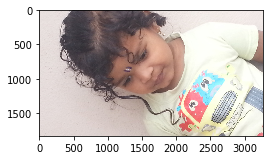

In [18]:
im1 = mpimg.imread('C:/Users/Naganandini/Nandu/DEEP learning/CNN/my_test_data_1/chubby.jpg')
fig=plt.figure(figsize=(4,4))
plt.imshow(im1)
plt.show()

In [ ]:
test_image1 = image.load_img('C:/Users/Naganandini/Nandu/DEEP learning/CNN/my_test_data/gaanu.jpg', target_size = (64, 64))
test_image1 = image.img_to_array(test_image1)
test_image1 = np.expand_dims(test_image1, axis = 0)
result = classifier.predict(test_image1)

In [62]:
test_image1.size

(64, 64)

In [63]:
test_image1 = image.img_to_array(test_image1)
test_image1 = np.expand_dims(test_image1, axis = 0)
result1 = classifier.predict(test_image1)
result1

array([[0., 1., 0.]], dtype=float32)

In [64]:
if result1[0][0] == 1:
    prediction = 'Gaanu'
    print(prediction)
elif result1[0][1] == 1:
    prediction = 'Chubby'
    print(prediction)
else:
    prediction = 'Dyutith'
    print(prediction)

Chubby
